In [1]:
import pandas as pd

In [3]:
path = "/ptmp/dduka/databases/EK100_320p_15sec_30fps_libx264/epic-kitchens-100-annotations/retrieval_annotations/EPIC_100_retrieval_test.csv"

df = pd.read_csv(path)

In [4]:
df.head()

,narration_id,participant_id,video_id,narration_timestamp,start_timestamp,stop_timestamp,start_frame,stop_frame,narration,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
0,P01_11_0,P01,P01_11,00:00:00.560,00:00:00.00,00:00:01.89,1,113,take plate,take,0,plate,2,['plate'],[2]
1,P01_11_1,P01,P01_11,00:00:01.700,00:00:01.56,00:00:02.45,93,147,put down plate,put-down,1,plate,2,['plate'],[2]
2,P01_11_10,P01,P01_11,00:00:48.500,00:00:49.15,00:00:50.95,2949,3057,take paper,take,0,paper,49,['paper'],[49]
3,P01_11_100,P01,P01_11,00:05:27.840,00:05:27.28,00:05:31.97,19636,19918,wash cloth,wash,2,cloth,17,['cloth'],[17]
4,P01_11_101,P01,P01_11,00:05:26.840,00:05:27.37,00:05:29.86,19642,19791,take cloth,take,0,cloth,17,['cloth'],[17]


In [ ]:
df['start_timestamp'] = pd.to_timedelta(df['start_timestamp'])
df['stop_timestamp'] = pd.to_timedelta(df['stop_timestamp'])

df['duration'] = df['stop_timestamp'] - df['start_timestamp']

avg_duration = df['duration'].mean().total_seconds()
std_duration = df['duration'].std().total_seconds()

print(f"Average duration: {avg_duration:.3f} seconds")
print(f"Standard deviation: {std_duration:.3f} seconds")

Average duration: 3.683 seconds
Standard deviation: 5.724 seconds


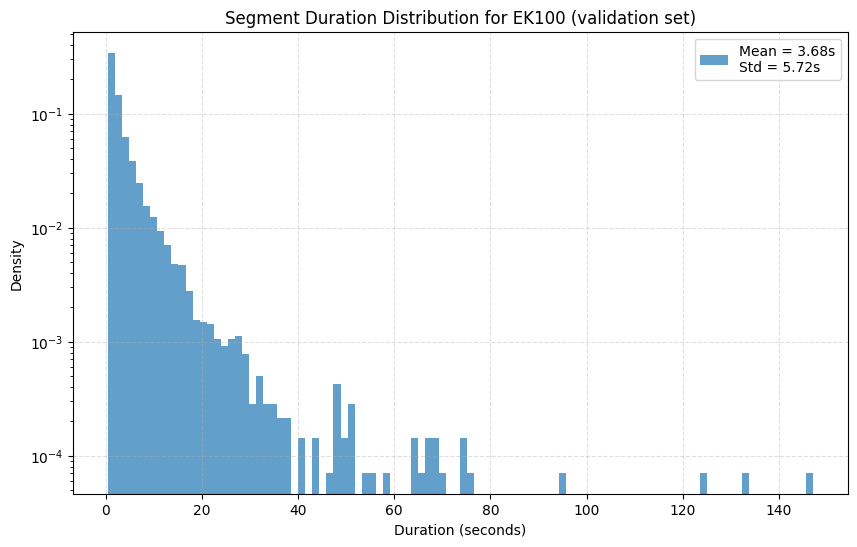

In [22]:
import matplotlib.pyplot as plt
# Compute duration in seconds
durations = df["duration"].dt.total_seconds()

plt.figure(figsize=(10, 6))
plt.hist(
    durations,
    bins=100,
    density=True,
    alpha=0.7,
    label=f"Mean = {avg_duration:.2f}s\nStd = {std_duration:.2f}s"
)
plt.title("Segment Duration Distribution for EK100 (validation set)")
plt.xlabel("Duration (seconds)")
plt.ylabel("Density")
plt.yscale("log")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()
